In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [6]:
data = pd.read_excel('./data.xlsx')
labels = data.keys()[1:]
index_num = len(labels)
years = data['年份']
year_num = len(years)
values = data[labels].values

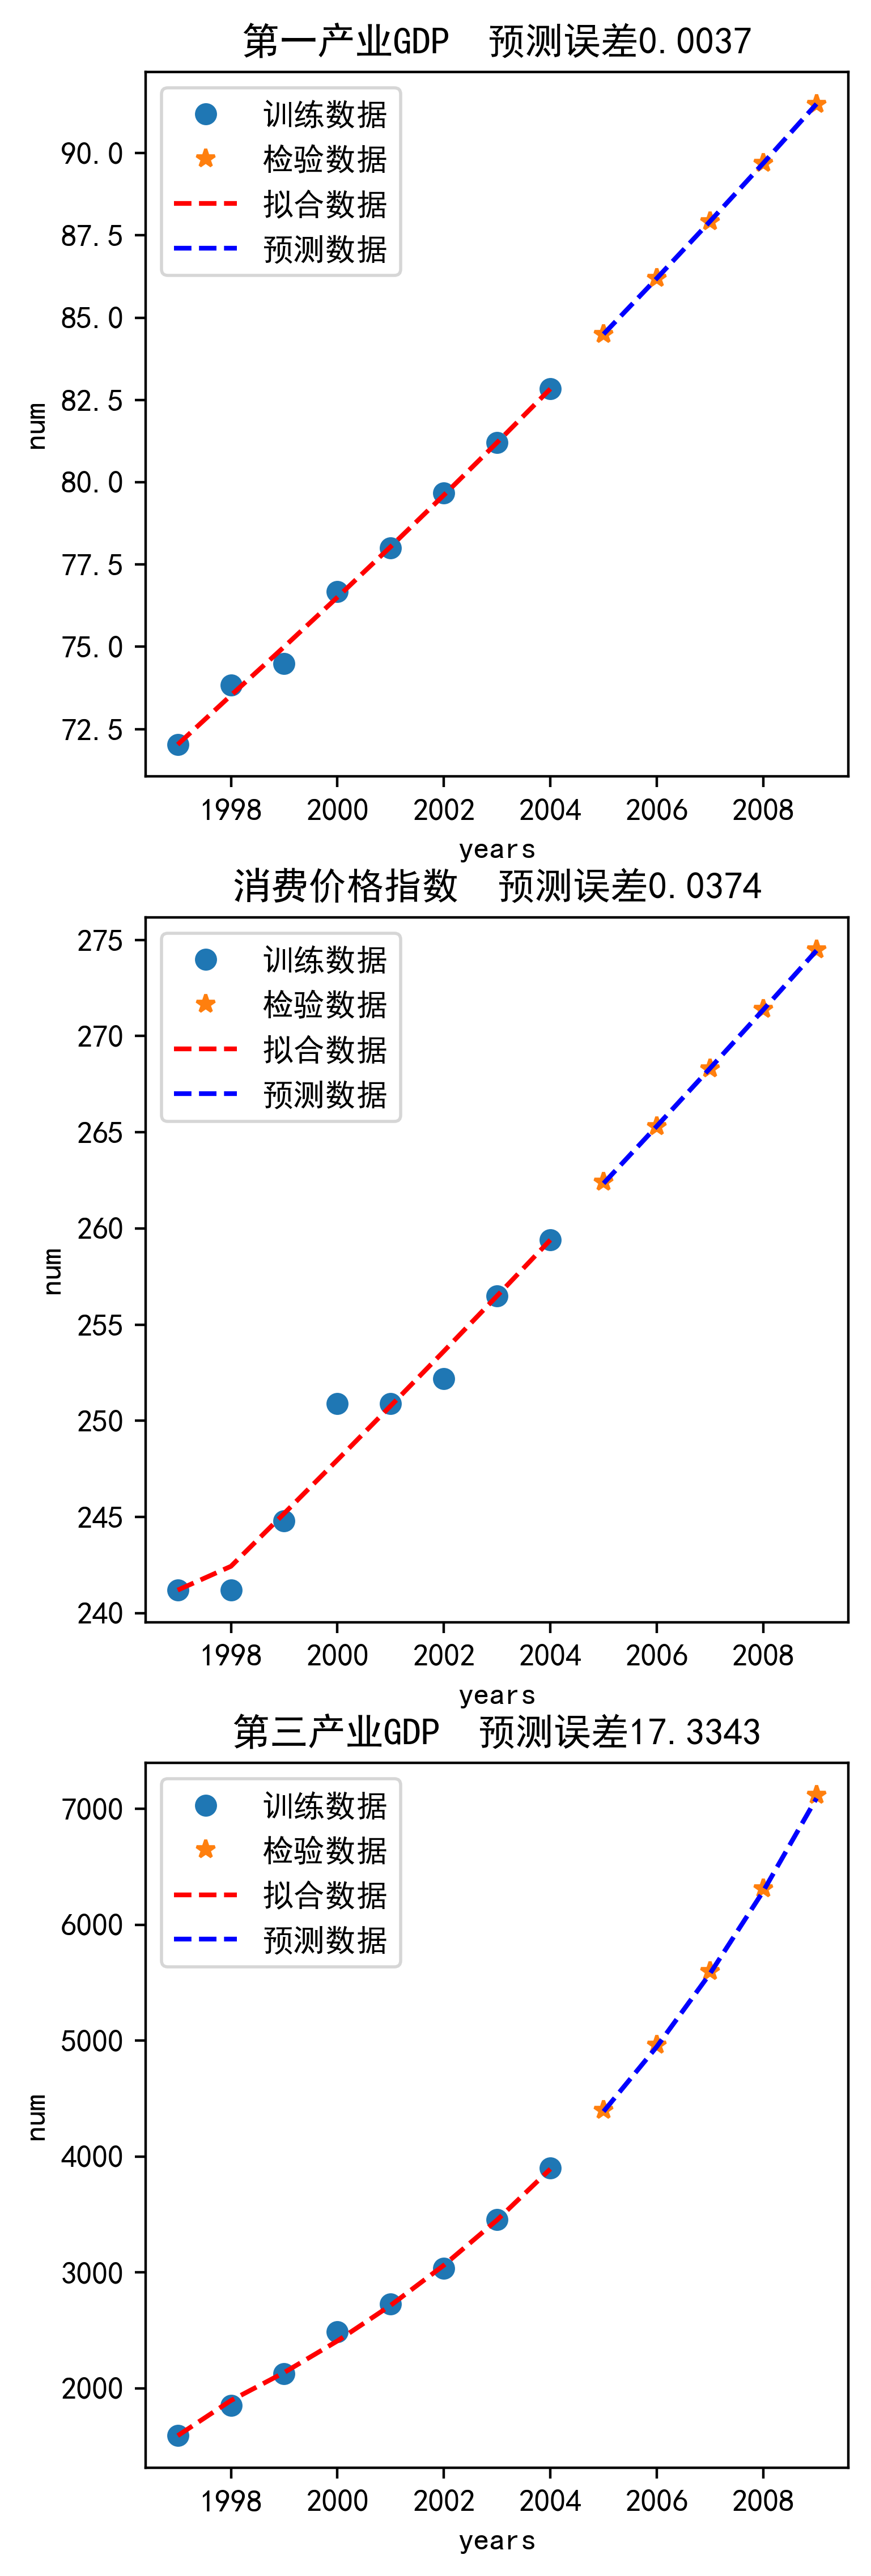

In [7]:
fig = plt.figure(figsize=(4, 14), dpi=400)
for i in range(index_num):
    label = labels[i]
    value = values[:, i]
    index_train = np.arange(0, 8)
    train_num = 8
    index_test = np.arange(8, year_num)
    test_num = year_num - 8
    value_train = value[index_train]
    value_train_cumsum = value_train.cumsum()
    value_test = value[index_test]
    B = np.ones((train_num-1, 2))
    for j in range(train_num-1):
        B[j, 0] = -0.5*(value_train_cumsum[j] + value_train_cumsum[j+1])
    Y = value_train[1:]
    a_u = np.linalg.inv(B.T@B)@B.T@Y.T
    a = a_u[0]
    u = a_u[1]
    value_pre = (value_train_cumsum[0]-u/a)*np.exp(-a*(years-years[0]))+u/a
    value_pre1 = copy.deepcopy(value_pre)
    for m in range(1, len(value_pre)):
        value_pre1[m] = value_pre[m] - value_pre[m-1]
    wucha = np.abs(value_pre1[index_test] - value_test).mean()
    ax = fig.add_subplot(index_num, 1, i+1)
    ax.plot(years[index_train], value_train, 'o')
    ax.plot(years[index_test], value_test, '*')
    ax.plot(years[index_train], value_pre1[index_train], 'r--')
    ax.plot(years[index_test], value_pre1[index_test], 'b--')
    ax.set(title=label+'  预测误差{:.4f}'.format(wucha), xlabel='years', ylabel='num')
    ax.legend(['训练数据', '检验数据', '拟合数据', '预测数据'])

In [8]:
value_pre1

0     1592.740000
1     1896.046574
2     2137.631278
3     2409.997488
4     2717.067228
5     3063.262248
6     3453.567694
7     3893.603893
8     4389.707289
9     4949.021680
10    5579.601093
11    6290.525759
12    7092.032865
Name: 年份, dtype: float64